In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Tipping") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-04-27 15:39:04,253 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Read all Data


In [2]:
df = spark.read.parquet(f"/taxi/dataset.parquet")

In [3]:
import pyspark.sql.functions as f

In [4]:
df.show(2)

+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+
|year|month|    pickup_datetime|   dropoff_datetime|passenger_count|     trip_distance|payment_type|tip_amount|trip_amount|total_amount|
+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+
|2012|    5|2012-05-24 08:33:55|2012-05-24 08:38:35|              4|1.2874720000000002|           2|       0.0|        5.4|         5.4|
|2009|   10|2009-10-20 06:50:13|2009-10-20 06:58:14|              1|          3.057746|           2|       0.0|        7.3|         7.3|
+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+
only showing top 2 rows



In [5]:
filtered = df.filter("payment_type = 1")

In [9]:
filtered.withColumn("percentage_tip", f.round(f.expr("100*tip_amount/trip_amount"),0)).show(2)

+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+--------------+
|year|month|    pickup_datetime|   dropoff_datetime|passenger_count|     trip_distance|payment_type|tip_amount|trip_amount|total_amount|percentage_tip|
+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+--------------+
|2011|    3|2011-03-15 18:40:34|2011-03-15 18:51:33|              1|3.5405480000000003|           1|       1.0|       10.0|        11.0|          10.0|
|2009|   10|2009-10-05 15:26:00|2009-10-05 15:33:00|              2|         2.7197846|           1|       2.0|        6.5|         8.5|          31.0|
+----+-----+-------------------+-------------------+---------------+------------------+------------+----------+-----------+------------+--------------+
only showing top 2 rows



In [10]:
percentage_df = filtered.withColumn("percentage_tip", f.round(f.expr("100*tip_amount/trip_amount"),0))

In [33]:
percentage_df.filter("percentage_tip = 20").show(2)

+----+-----+-------------------+-------------------+---------------+-------------+------------+----------+-----------+------------+--------------+
|year|month|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|payment_type|tip_amount|trip_amount|total_amount|percentage_tip|
+----+-----+-------------------+-------------------+---------------+-------------+------------+----------+-----------+------------+--------------+
|2012|    5|2012-05-17 13:30:00|2012-05-17 14:02:00|              5|   25.9747476|           1|       7.3|       37.0|        44.3|          20.0|
|2012|    5|2012-05-03 20:16:12|2012-05-03 20:21:48|              2|     2.896812|           1|       1.5|        7.5|         9.0|          20.0|
+----+-----+-------------------+-------------------+---------------+-------------+------------+----------+-----------+------------+--------------+
only showing top 2 rows



In [28]:
data = (
    percentage_df.groupBy("percentage_tip").count().filter("count > 1000").filter("percentage_tip < 50").orderBy("percentage_tip")
).toPandas()


In [29]:
data

,percentage_tip,count
0,0.0,32279986
1,1.0,832604
2,2.0,593634
3,3.0,855084
4,4.0,1759331
5,5.0,4161030
6,6.0,6121619
7,7.0,9030620
8,8.0,14293191
9,9.0,16303419


<AxesSubplot:title={'center':'Tip'}, xlabel='Tip [%]', ylabel='Count'>

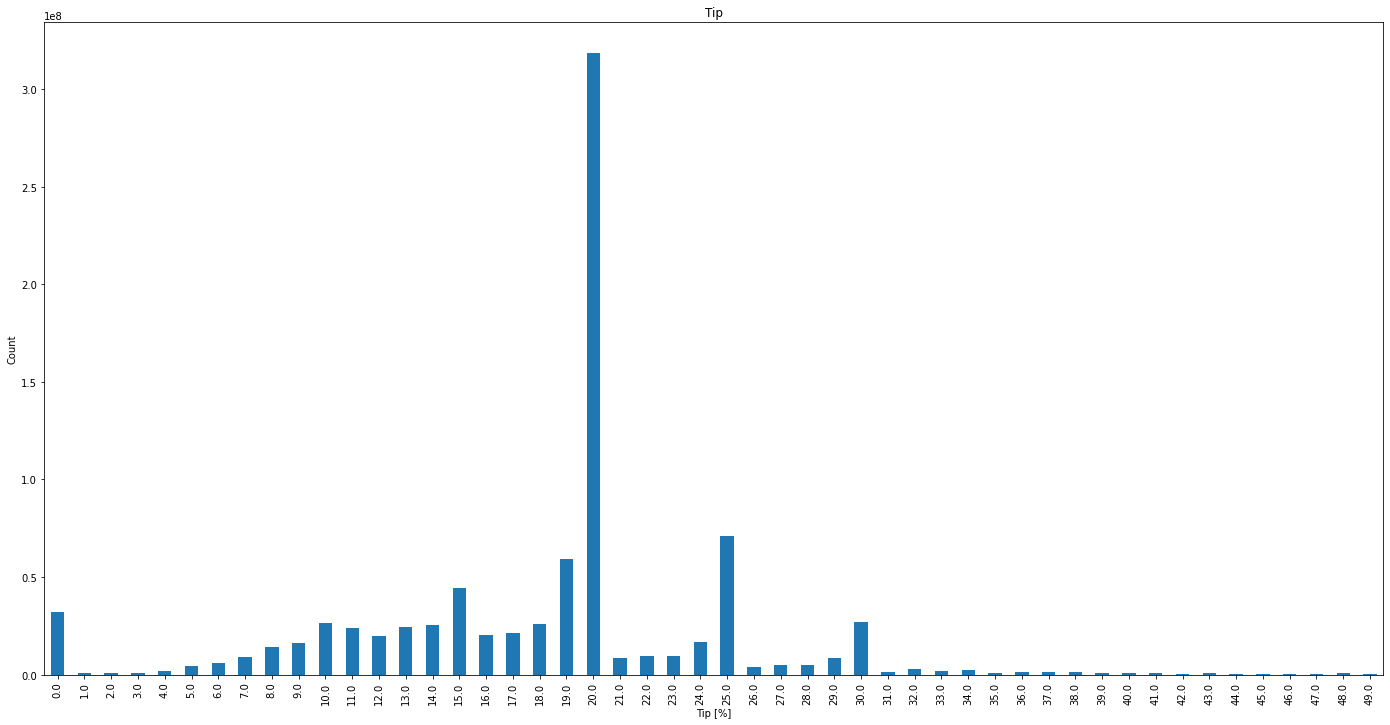

In [32]:
data.plot(
    x='percentage_tip', y='count', figsize=(24, 12), 
    title='Tip',
    legend=False,
    kind='bar',
    xlabel='Tip [%]',
    ylabel='Count'
)

### Stopping Spark 

In [28]:
spark.stop()